In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


# Carregando o DF

In [ ]:
df = pd.read_csv('../DF/dados_tratados_ana_carnaubal_completo2.csv', sep=';', encoding='utf-8')
df['data'] = pd.to_datetime(df['data'], errors='coerce')
df = pd.DataFrame(df)


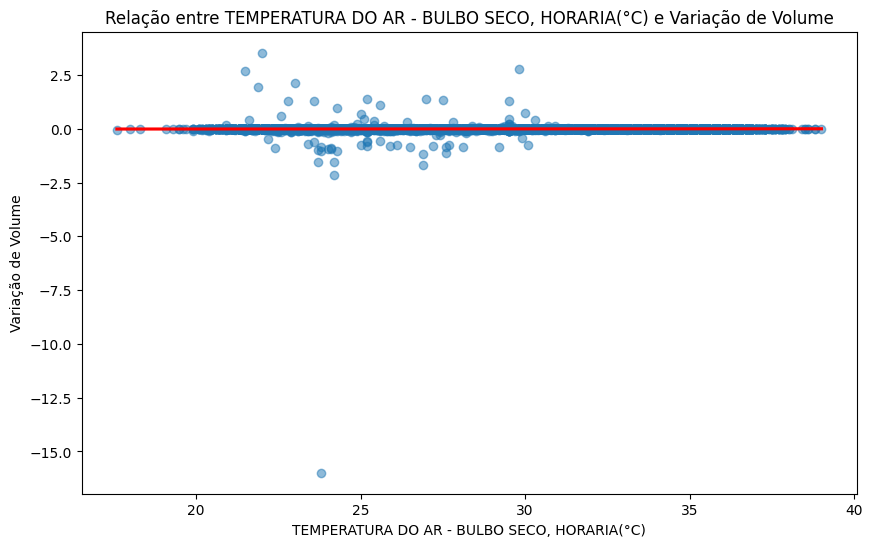

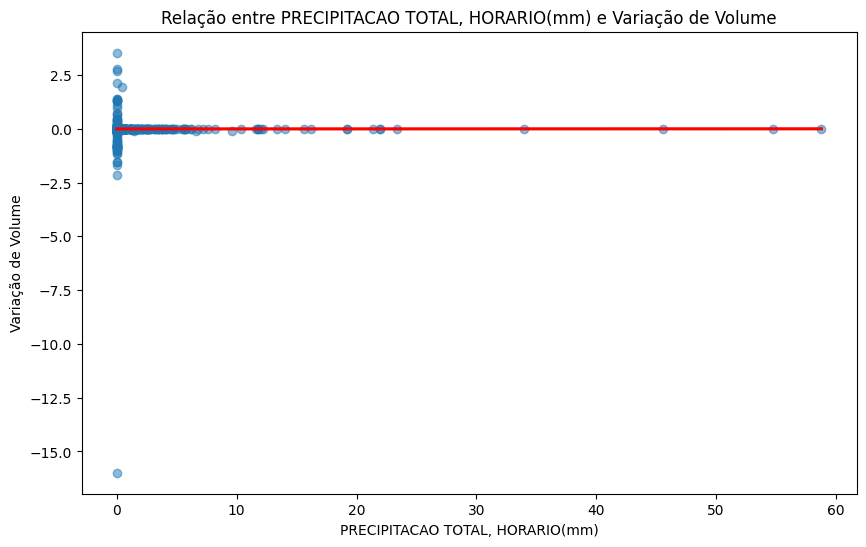

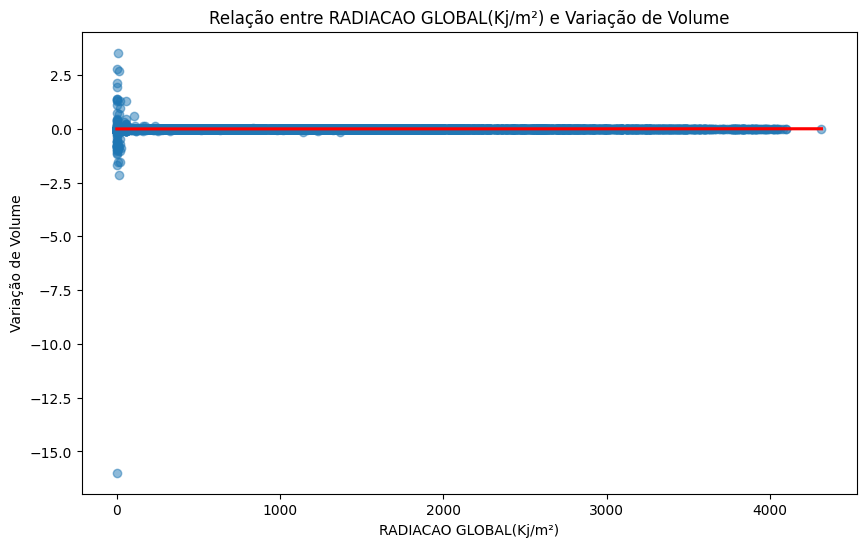

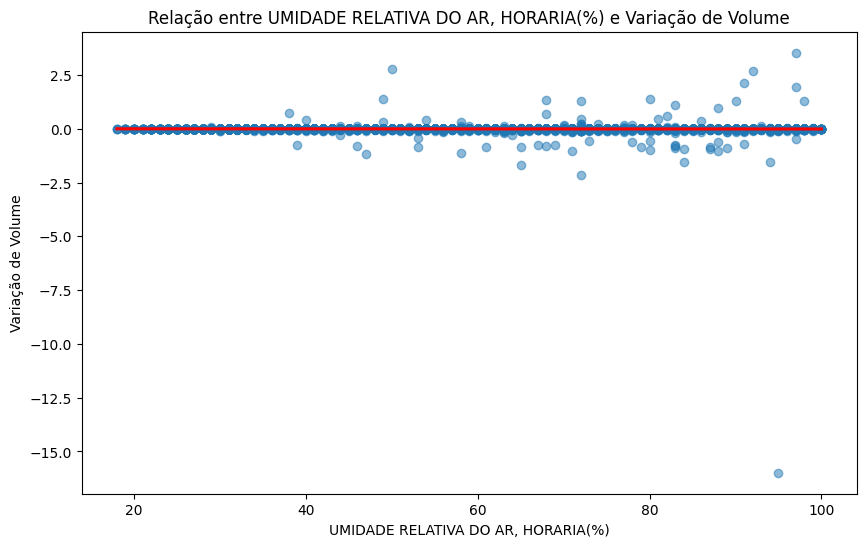

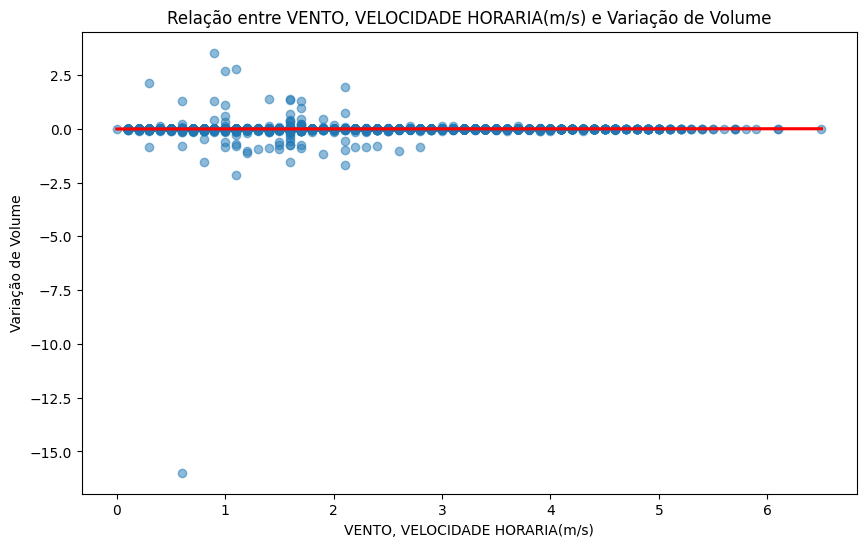

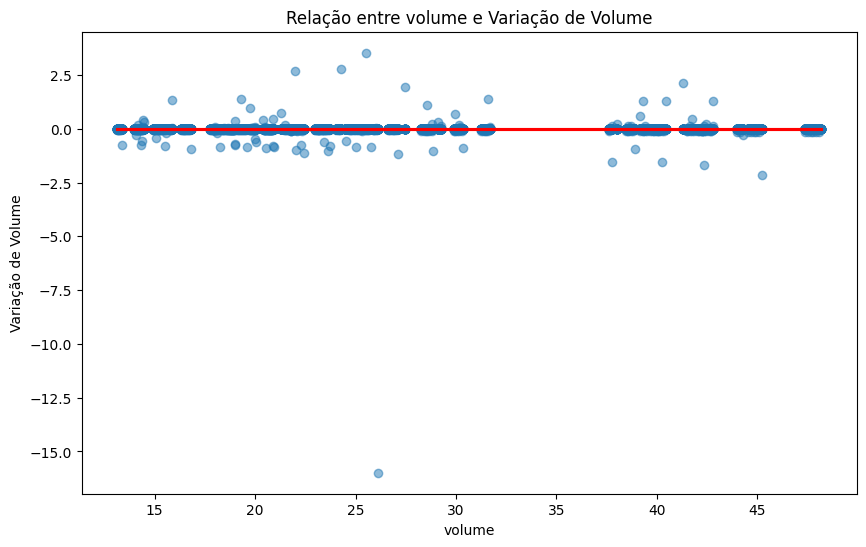

In [15]:
features_clima = ['TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)','PRECIPITACAO TOTAL, HORARIO(mm)','RADIACAO GLOBAL(Kj/m²)','UMIDADE RELATIVA DO AR, HORARIA(%)','VENTO, VELOCIDADE HORARIA(m/s)', 'volume']
for feature in features_clima:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=feature, y='variacao_volume', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Relação entre {feature} e Variação de Volume')
    plt.xlabel(feature)
    plt.ylabel('Variação de Volume')
    plt.show()

# Definindo as variáveis

In [5]:
x = df.drop(columns=['data', 'volume','variacao_volume'])
y = df['variacao_volume']

# Dividindo os dados em treino e teste

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4, random_state=42)

# Modelo -> Random Florest

In [35]:
model = RandomForestRegressor(n_estimators=15000, random_state=42, n_jobs=-1)

In [37]:
model.fit(x_treino, y_treino)

,n_estimators,15000
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
prevision = model.predict(x_teste)
r2 = r2_score(y_teste, prevision)
mae = mean_absolute_error(y_teste, prevision)

In [39]:
print(f'R²: {r2}')
print(f'MAE: {mae}')

R²: -0.4420928846732073
MAE: 0.013196263897733604


--- Análise da Variável Alvo (y) ---
count    13052.000000
mean        -0.002687
std          0.161442
min        -15.990000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.540000
Name: variacao_volume, dtype: float64

--- Histograma da Variável Alvo ---


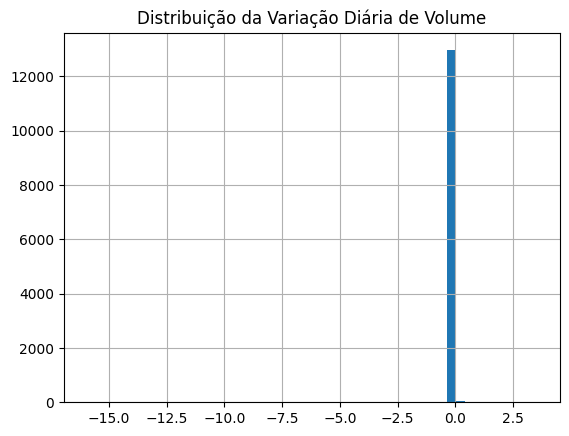

In [40]:
print("--- Análise da Variável Alvo (y) ---")
print(y.describe())

print("\n--- Histograma da Variável Alvo ---")
y.hist(bins=50)
plt.title('Distribuição da Variação Diária de Volume')
plt.show()